In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from statsmodels.tools.tools import add_constant

# To build model for prediction
import statsmodels.api as SM
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# Connect with Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file= pd.read_csv('/content/drive/MyDrive/Great Learning/INNHotelsGroup.csv')

# Data Overview

In [ ]:
data= file.copy()

In [ ]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [ ]:
data.shape

(36275, 19)

In [ ]:
for column in data.columns:
    unique_values = data[column].dropna().astype(str).unique()
    print(f"Unique values in column '{column}': {list(unique_values)}")

Unique values in column 'Booking_ID': ['INN00001', 'INN00002', 'INN00003', 'INN00004', 'INN00005', 'INN00006', 'INN00007', 'INN00008', 'INN00009', 'INN00010', 'INN00011', 'INN00012', 'INN00013', 'INN00014', 'INN00015', 'INN00016', 'INN00017', 'INN00018', 'INN00019', 'INN00020', 'INN00021', 'INN00022', 'INN00023', 'INN00024', 'INN00025', 'INN00026', 'INN00027', 'INN00028', 'INN00029', 'INN00030', 'INN00031', 'INN00032', 'INN00033', 'INN00034', 'INN00035', 'INN00036', 'INN00037', 'INN00038', 'INN00039', 'INN00040', 'INN00041', 'INN00042', 'INN00043', 'INN00044', 'INN00045', 'INN00046', 'INN00047', 'INN00048', 'INN00049', 'INN00050', 'INN00051', 'INN00052', 'INN00053', 'INN00054', 'INN00055', 'INN00056', 'INN00057', 'INN00058', 'INN00059', 'INN00060', 'INN00061', 'INN00062', 'INN00063', 'INN00064', 'INN00065', 'INN00066', 'INN00067', 'INN00068', 'INN00069', 'INN00070', 'INN00071', 'INN00072', 'INN00073', 'INN00074', 'INN00075', 'INN00076', 'INN00077', 'INN00078', 'INN00079', 'INN00080', '

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275,36275,INN36275,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_adults,36275.00000,NaN,NaN,NaN,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,NaN,NaN,NaN,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,NaN,NaN,NaN,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,NaN,NaN,NaN,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.00000,NaN,NaN,NaN,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.00000,NaN,NaN,NaN,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,NaN,NaN,NaN,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000


In [ ]:
Duplicates=int(data.duplicated().sum())
print(f"The number of duplicates in the data set is :{Duplicates}")

The number of duplicates in the data set is :0


In [ ]:
data.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [ ]:
More_than_58=data[data["no_of_previous_bookings_not_canceled"]==58]
display(More_than_58)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
29572,INN29573,1,0,0,2,Meal Plan 1,0,Room_Type 1,8,2018,12,28,Corporate,1,6,58,65.00000,2,Not_Canceled


In [ ]:
More_than_13=data[data["no_of_previous_cancellations"]==13]
display(More_than_13)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
12097,INN12098,2,0,1,1,Meal Plan 1,0,Room_Type 1,190,2018,4,9,Offline,1,13,1,70.00000,0,Canceled
12109,INN12110,2,0,1,1,Meal Plan 1,0,Room_Type 1,190,2018,4,9,Offline,1,13,1,70.00000,0,Canceled
16277,INN16278,2,0,1,1,Meal Plan 1,0,Room_Type 1,190,2018,4,9,Offline,1,13,1,70.00000,0,Canceled
30833,INN30834,2,0,1,1,Meal Plan 1,0,Room_Type 1,190,2018,4,9,Offline,1,13,1,70.00000,0,Canceled


In [ ]:
More_than_13=data[data["no_of_previous_bookings_not_canceled"]==13]
display(More_than_13)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
1732,INN01733,1,0,0,2,Meal Plan 1,1,Room_Type 1,3,2018,3,31,Corporate,1,1,13,67.00000,0,Not_Canceled
3614,INN03615,1,0,1,0,Meal Plan 1,0,Room_Type 1,0,2018,3,21,Corporate,1,0,13,65.00000,1,Not_Canceled
11448,INN11449,2,0,0,1,Meal Plan 1,0,Room_Type 1,9,2018,8,11,Corporate,1,3,13,75.00000,0,Not_Canceled
15798,INN15799,1,0,0,2,Meal Plan 1,0,Room_Type 1,6,2018,3,1,Corporate,1,0,13,66.00000,1,Not_Canceled
20433,INN20434,1,0,0,2,Meal Plan 1,0,Room_Type 1,6,2017,12,8,Corporate,1,2,13,65.00000,0,Not_Canceled
24142,INN24143,1,0,0,2,Meal Plan 1,0,Room_Type 5,1,2018,3,1,Complementary,1,3,13,0.00000,1,Not_Canceled
25516,INN25517,1,0,0,2,Meal Plan 1,0,Room_Type 1,0,2018,1,13,Complementary,1,0,13,0.00000,2,Not_Canceled


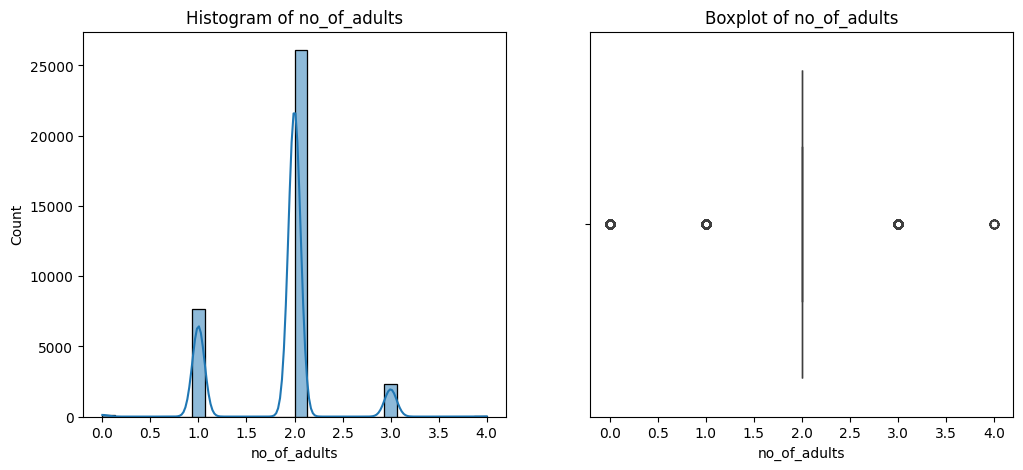

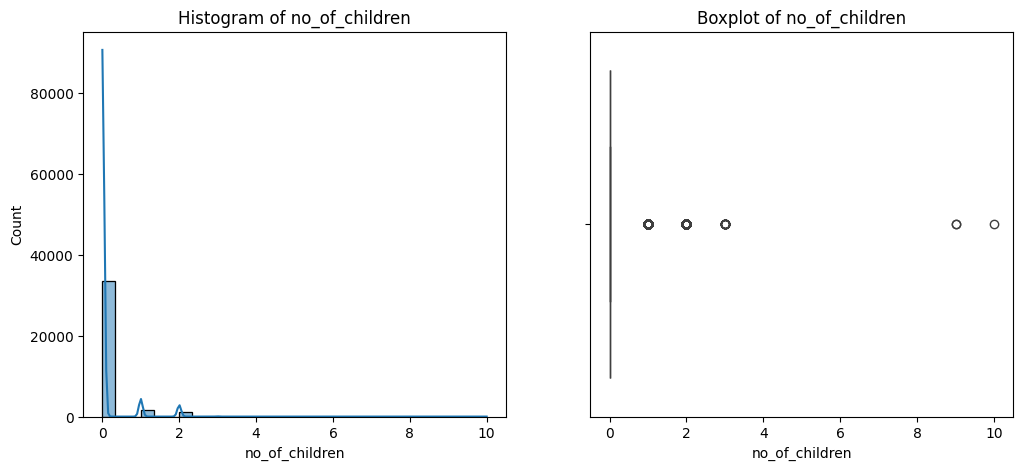

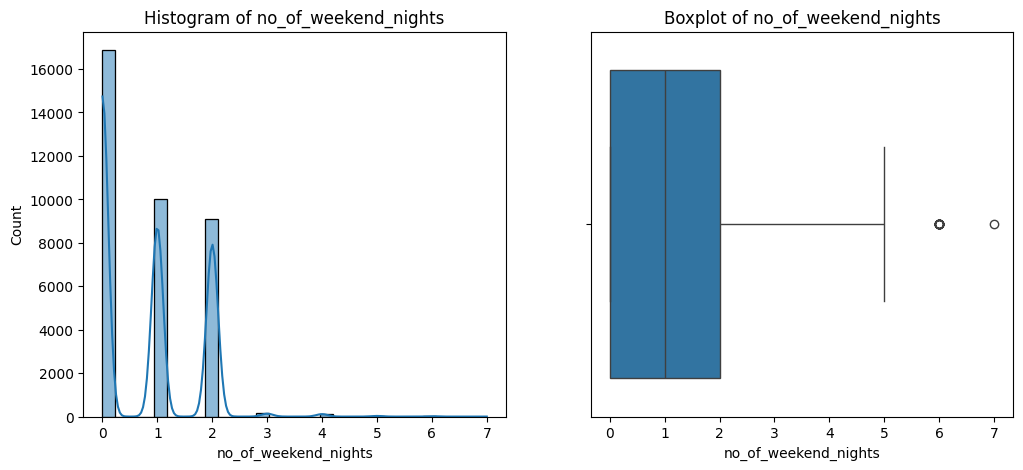

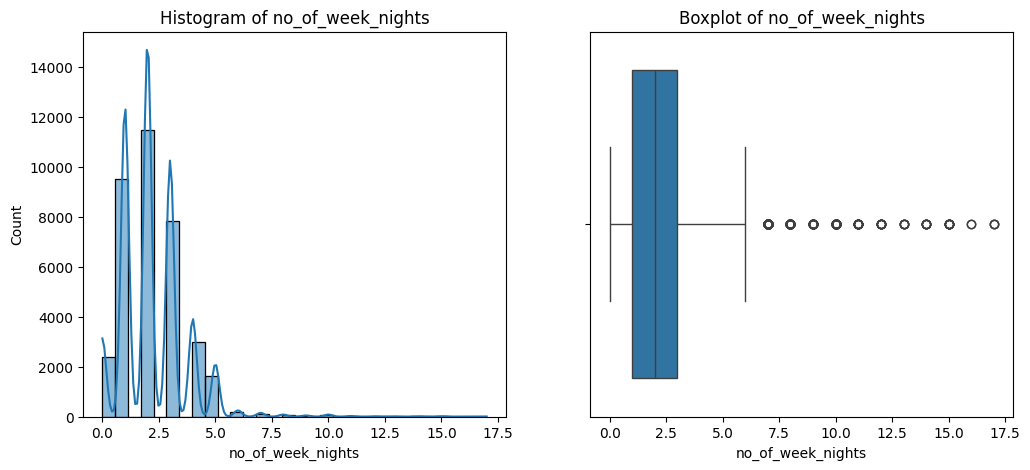

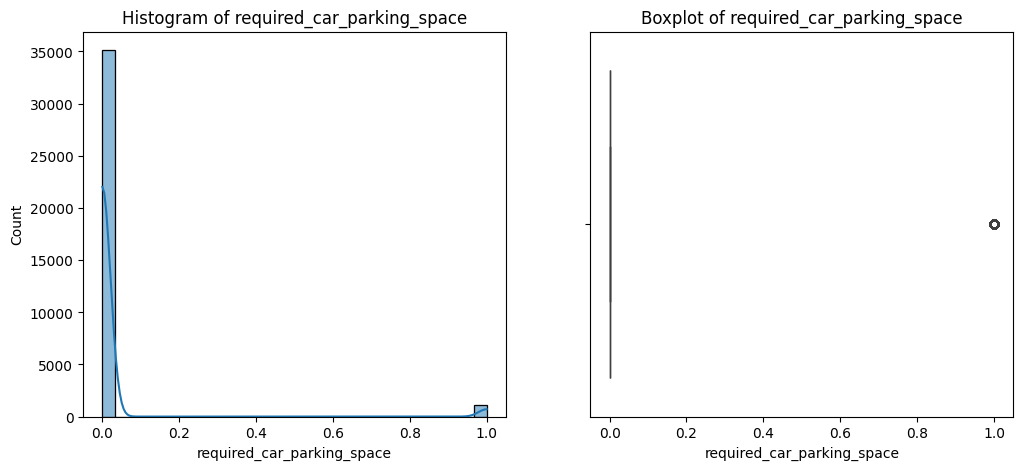

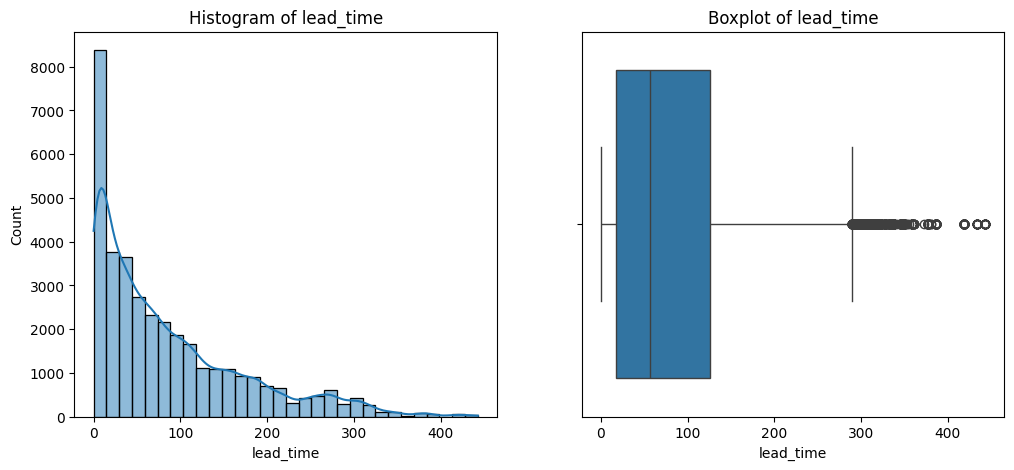

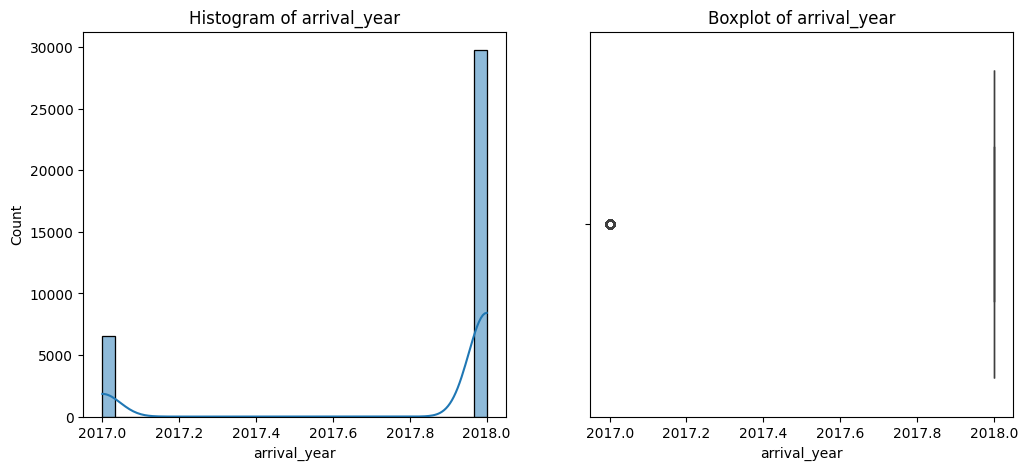

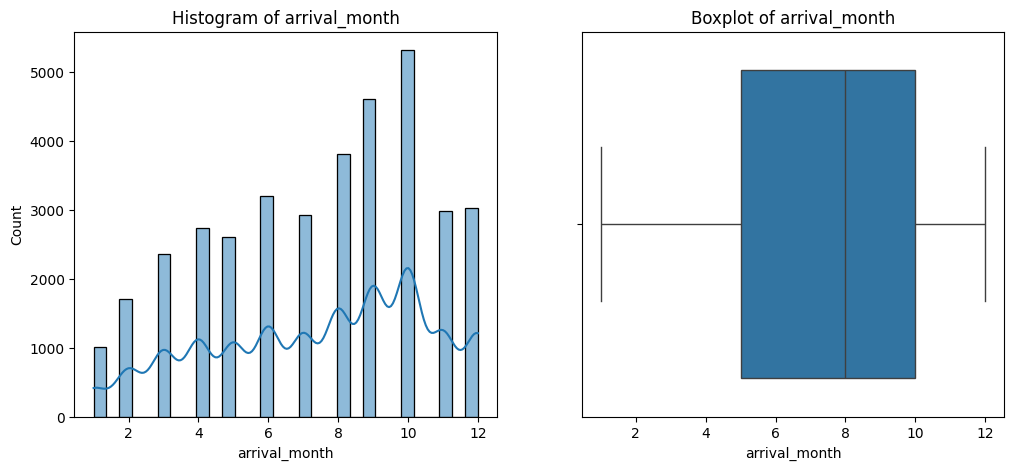

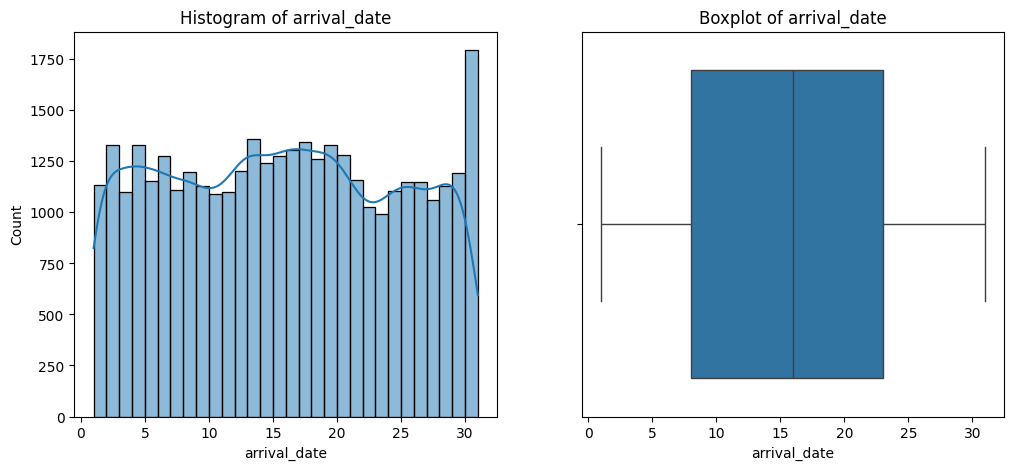

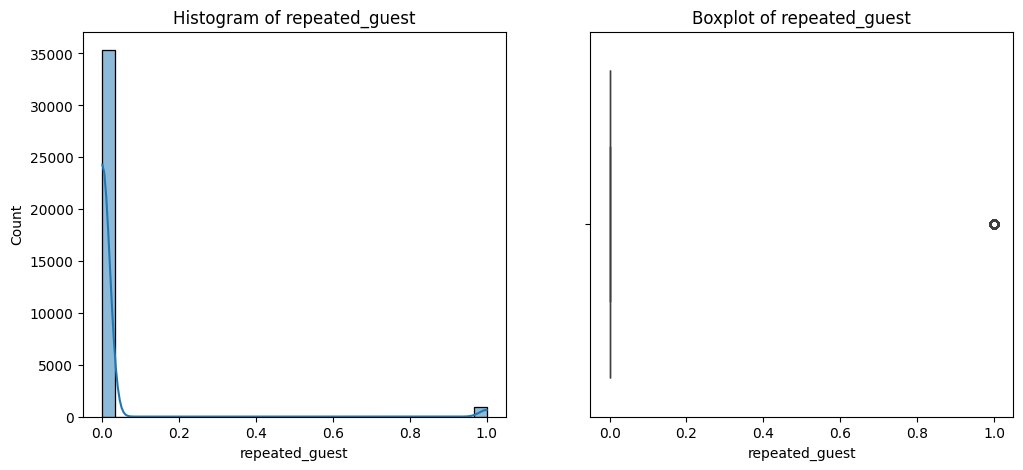

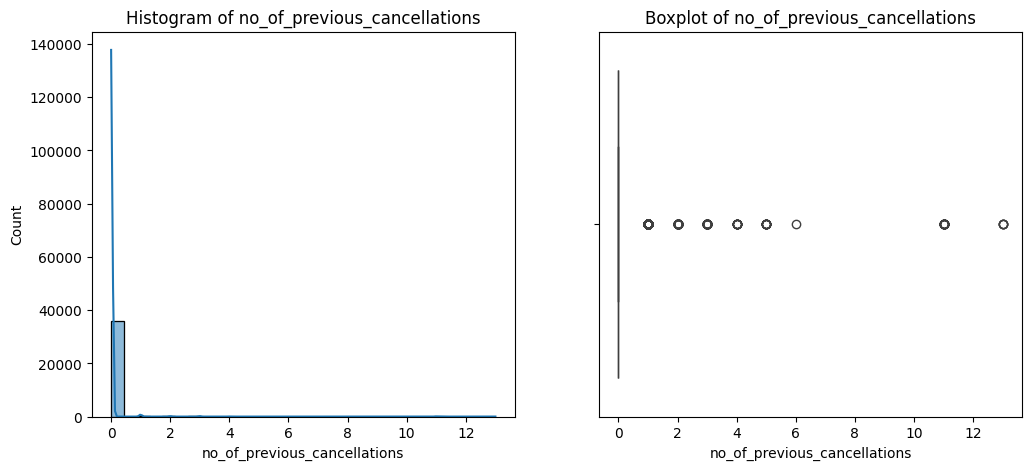

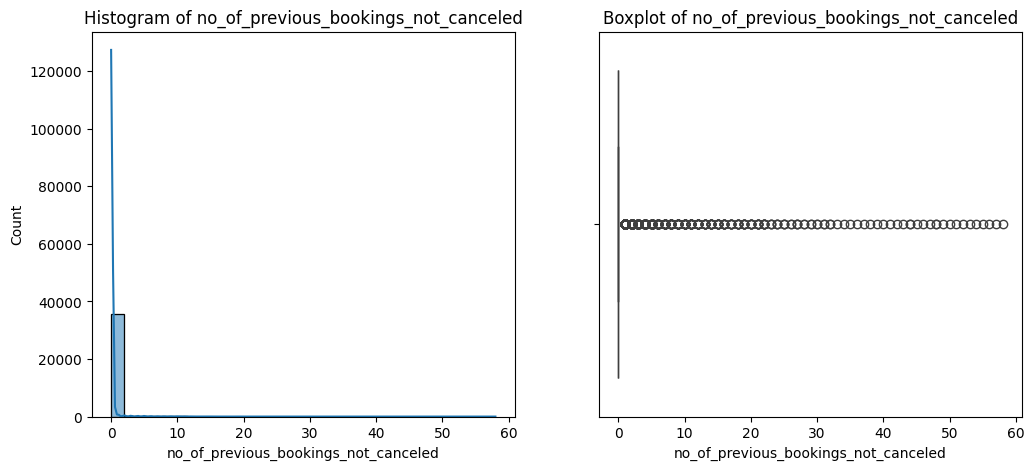

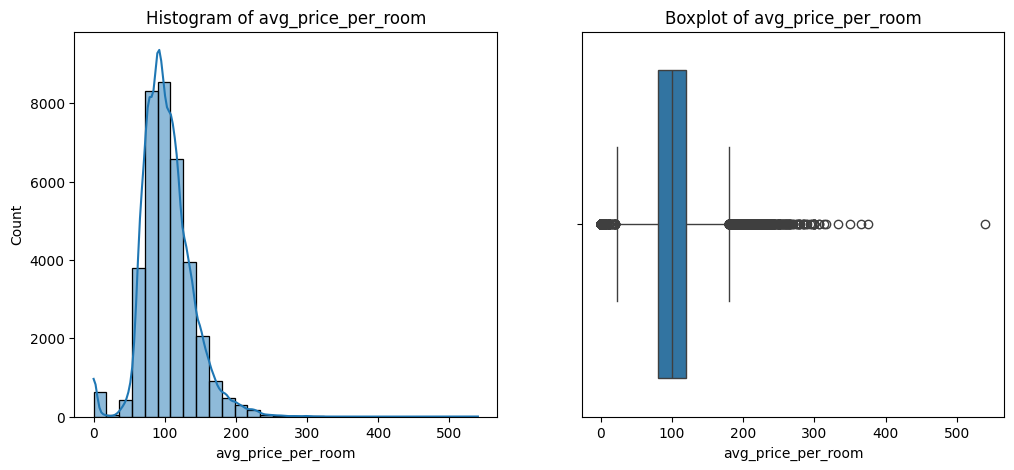

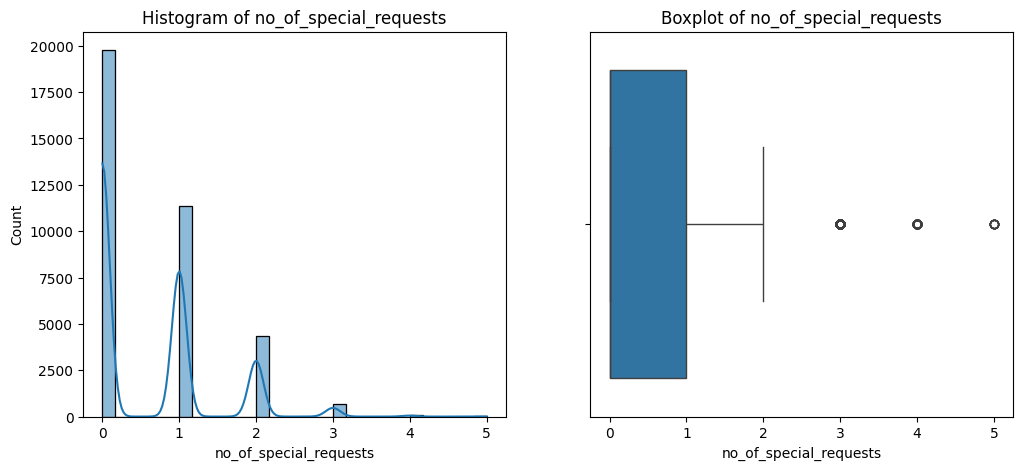

In [ ]:
numerical_column = data.select_dtypes(include=['int64', 'float64'])
for i, col in enumerate(numerical_column):
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')

    plt.show()

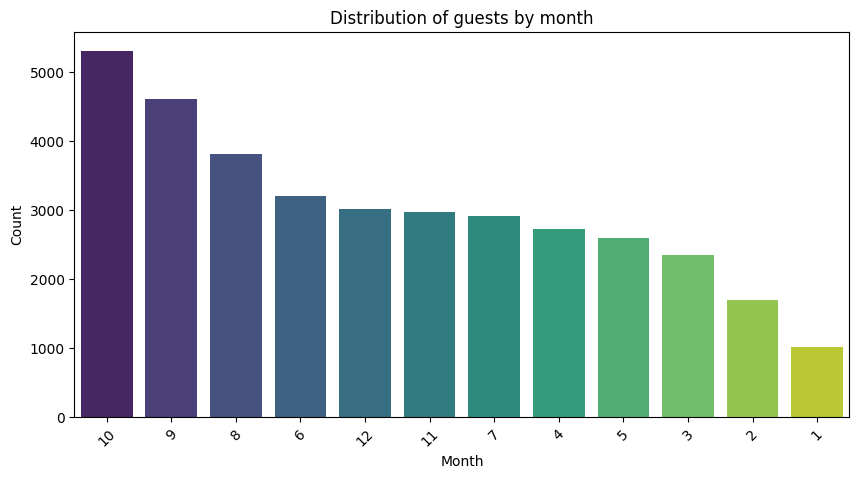

In [ ]:
# What are the busiest month in the hotel ?
plt.figure(figsize=(10, 5))

# Create a countplot for genre distribution
sns.countplot(x=data['arrival_month'], order=data['arrival_month'].value_counts().index, palette="viridis")

# Add labels and title
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Distribution of guests by month")
plt.xticks(rotation=45)  # Rotate x labels for readability

# Show the plot
plt.show()

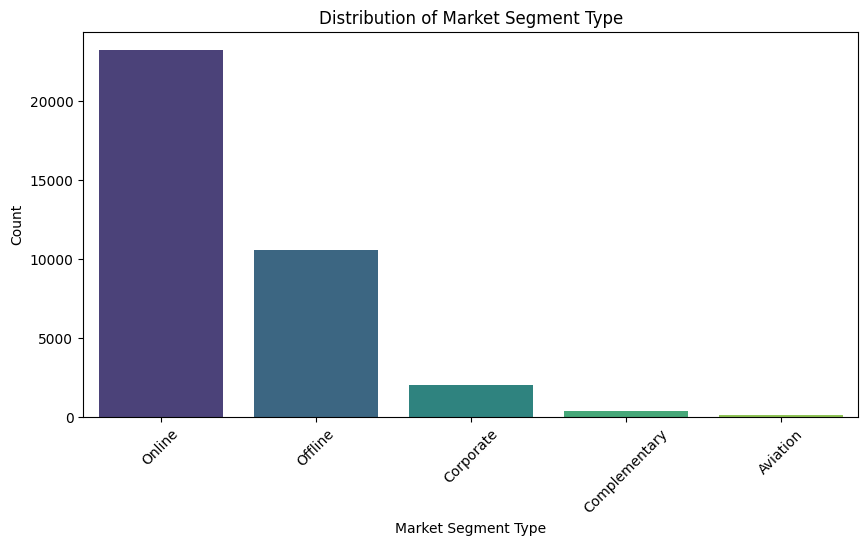

In [ ]:
#Which market segment do most of the guests come from?
plt.figure(figsize=(10, 5))

# Create a countplot for genre distribution
sns.countplot(x=data['market_segment_type'], order=data['market_segment_type'].value_counts().index, palette="viridis")

# Add labels and title
plt.xlabel("Market Segment Type")
plt.ylabel("Count")
plt.title("Distribution of Market Segment Type")
plt.xticks(rotation=45)  # Rotate x labels for readability

# Show the plot
plt.show()

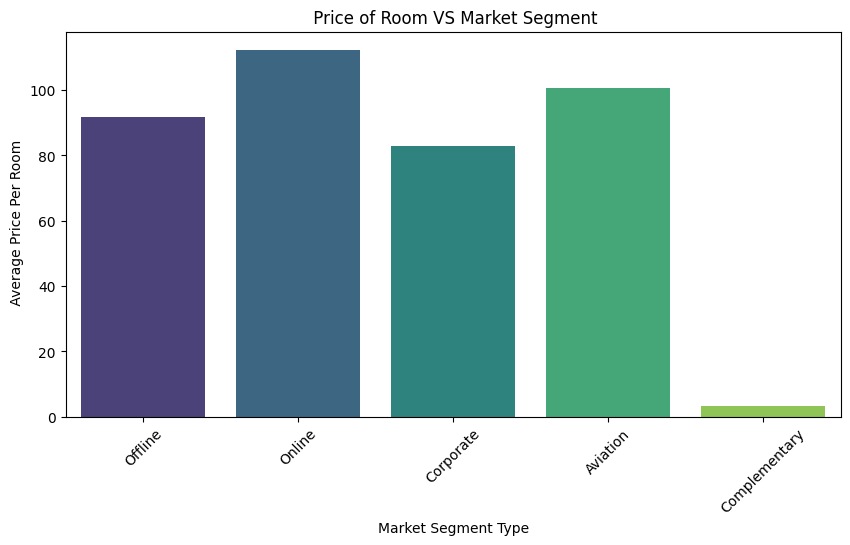

In [ ]:
#Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
plt.figure(figsize=(10, 5))
ax=sns.barplot(x=data["market_segment_type"], y=data["avg_price_per_room"], palette="viridis",ci=None)
plt.xticks(rotation=45)
plt.xlabel("Market Segment Type")
plt.ylabel(" Average Price Per Room")
plt.title(" Price of Room VS Market Segment")
plt.show()

In [ ]:
avg_price_by_segment = data.groupby('market_segment_type')['avg_price_per_room'].mean().sort_values()
display(avg_price_by_segment)


,avg_price_per_room
market_segment_type,
Complementary,3.14176
Corporate,82.91174
Offline,91.63268
Aviation,100.70400
Online,112.25685


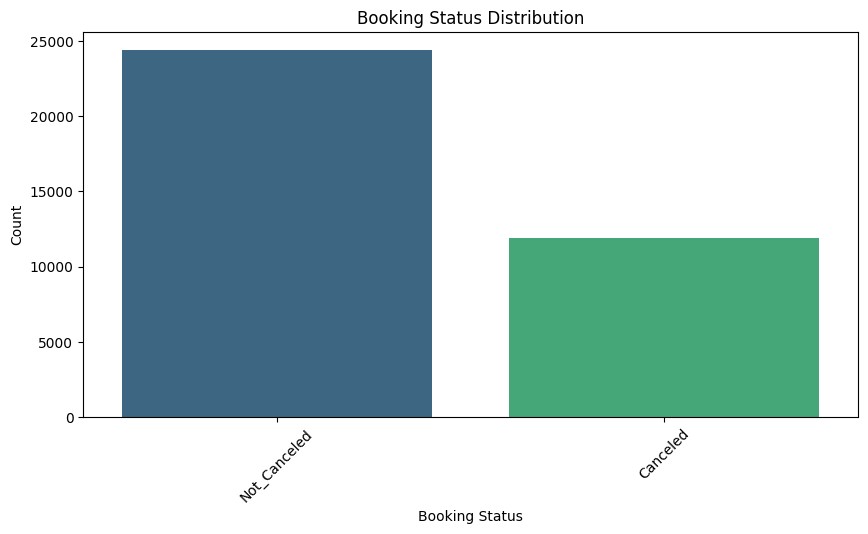

In [ ]:
#What percentage of bookings are canceled?
plt.figure(figsize=(10, 5))

# Create a countplot for genre distribution
sns.countplot(x=data['booking_status'],palette="viridis")

# Add labels and title
plt.xlabel("Booking Status")
plt.ylabel("Count")
plt.title("Booking Status Distribution")
plt.xticks(rotation=45)  # Rotate x labels for readability

# Show the plot
plt.show()

In [ ]:
# What percentage of bookings are canceled?
Not_cancelled= data[data['booking_status']=='Not_Canceled'].shape[0]
Canceled= data[data['booking_status']=='Canceled'].shape[0]
Percentage_of_Canceled= (Canceled/(Not_cancelled+Canceled))*100
print(f'The percentage of cancellation is :{Percentage_of_Canceled:.2f}%')

The percentage of cancellation is :32.76%


In [ ]:
#Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
Repeating_guest_not_cancelled= data[(data['booking_status']=='Not_Canceled') & (data['repeated_guest']==1)].shape[0]
Repeating_guest_cancelled= data[(data['booking_status']=='Canceled') & (data['repeated_guest']==1)].shape[0]
Percentage_of_cancellation= (Repeating_guest_cancelled/(Repeating_guest_not_cancelled+Repeating_guest_cancelled))*100
print(f'The percentage of cancellation is :{Percentage_of_cancellation:.2f}%')

The percentage of cancellation is :1.72%


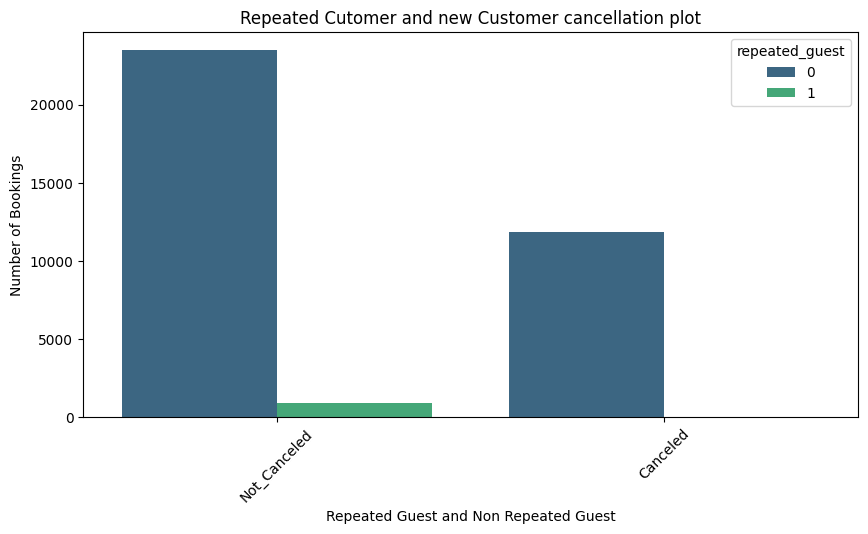

In [ ]:
plt.figure(figsize=(10, 5))

# Countplot to show the number of bookings with each number of special requests
sns.countplot(x='booking_status',
              hue='repeated_guest',   # Different colors for each booking status
              data=data,
              palette="viridis")

plt.xticks(rotation=45)
plt.xlabel("Repeated Guest and Non Repeated Guest")
plt.ylabel("Number of Bookings")
plt.title("Repeated Cutomer and new Customer cancellation plot")
plt.show()

In [ ]:
#Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?
Canceled_with_requests = data[(data['no_of_special_requests'] > 0) & (data['booking_status'] == 'Canceled')].shape[0]
Total_with_requests = data[data['no_of_special_requests'] > 0].shape[0]
Percentage_canceled_with_requests = (Canceled_with_requests / Total_with_requests) * 100
print(f"The percentage of cancellation with special request is {Percentage_canceled_with_requests:.2f}")


The percentage of cancellation with special request is 20.24


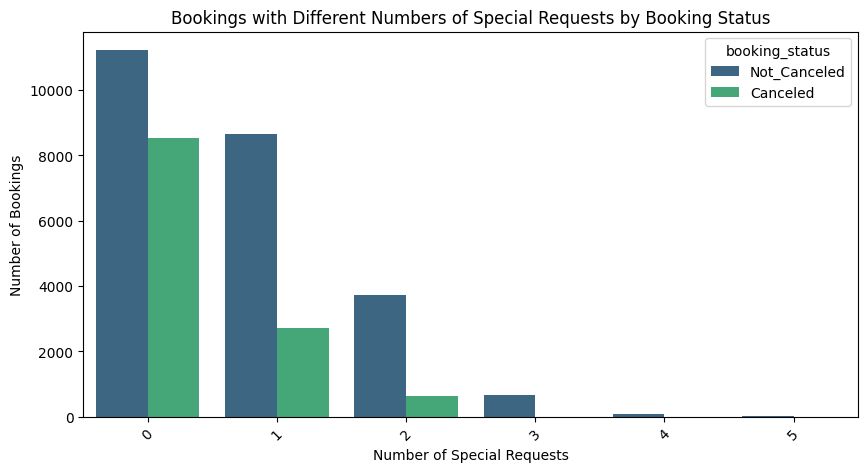

In [ ]:
#Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?
plt.figure(figsize=(10, 5))

# Countplot to show the number of bookings with each number of special requests
sns.countplot(x='no_of_special_requests',
              hue='booking_status',   # Different colors for each booking status
              data=data,
              palette="viridis")

plt.xticks(rotation=45)
plt.xlabel("Number of Special Requests")
plt.ylabel("Number of Bookings")
plt.title("Bookings with Different Numbers of Special Requests by Booking Status")
plt.show()

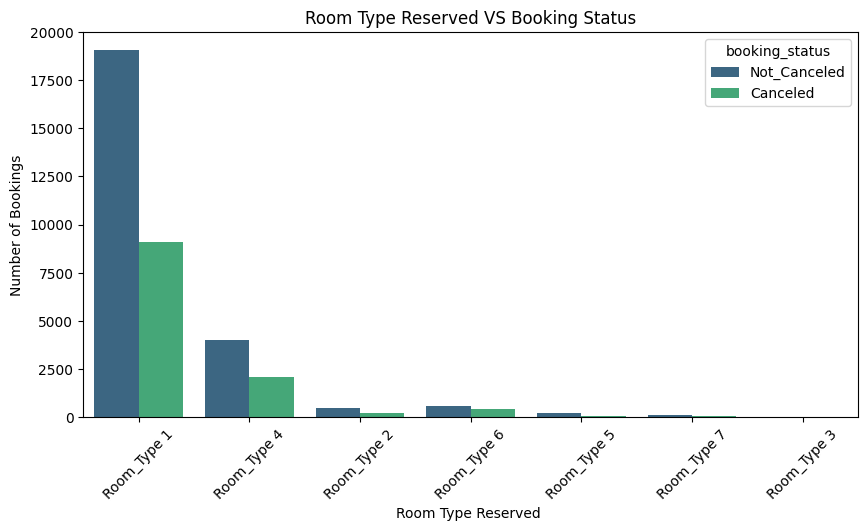

In [ ]:
plt.figure(figsize=(10, 5))

# Countplot to show the number of bookings with each number of special requests
sns.countplot(x='room_type_reserved',
              hue='booking_status',   # Different colors for each booking status
              data=data,
              palette="viridis")

plt.xticks(rotation=45)
plt.xlabel("Room Type Reserved ")
plt.ylabel("Number of Bookings")
plt.title("Room Type Reserved VS Booking Status")
plt.show()

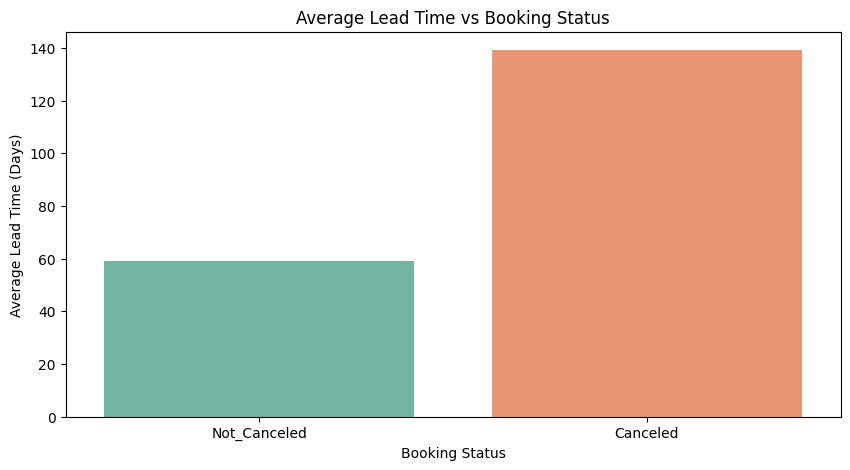

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='booking_status', y='lead_time', data=data, palette="Set2", ci=None)
plt.xlabel('Booking Status')
plt.ylabel('Average Lead Time (Days)')
plt.title('Average Lead Time vs Booking Status')
plt.show()

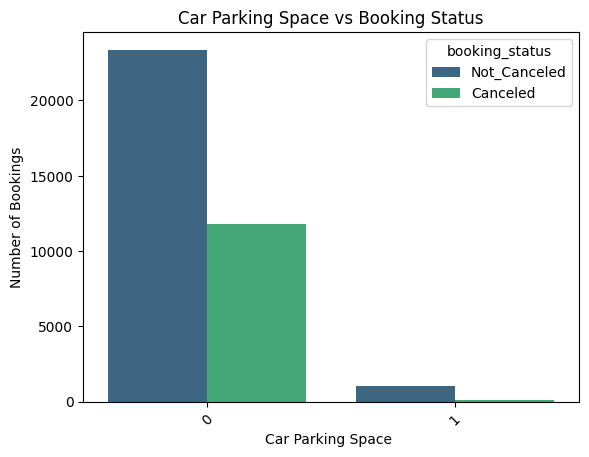

In [ ]:
# Countplot to show the booking status vs car parking status.
sns.countplot(x='required_car_parking_space',
              hue='booking_status',   # Different colors for each booking status
              data=data,
              palette="viridis")

plt.xticks(rotation=45)
plt.xlabel("Car Parking Space ")
plt.ylabel("Number of Bookings")
plt.title("Car Parking Space vs Booking Status")
plt.show()


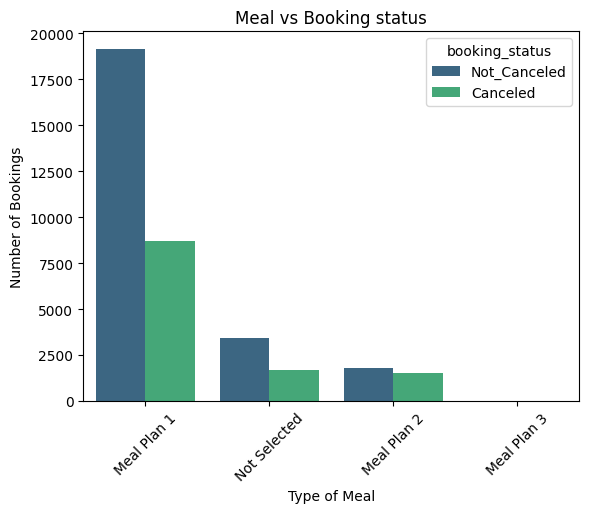

In [ ]:
# Countplot to show Meal Plan vs Booking Status
sns.countplot(x='type_of_meal_plan',
              hue='booking_status',   # Different colors for each booking status
              data=data,
              palette="viridis")

plt.xticks(rotation=45)
plt.xlabel("Type of Meal")
plt.ylabel("Number of Bookings")
plt.title("Meal vs Booking status")
plt.show()


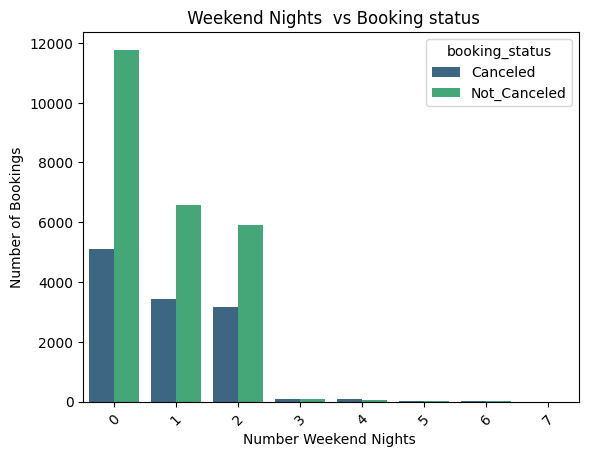

In [ ]:
#Weekend nighst Vs Booking Status
sns.countplot(x='no_of_weekend_nights',
              hue='booking_status',   # Different colors for each booking status
              data=data,
              palette="viridis")

plt.xticks(rotation=45)
plt.xlabel("Number Weekend Nights ")
plt.ylabel("Number of Bookings")
plt.title(" Weekend Nights  vs Booking status")
plt.show()


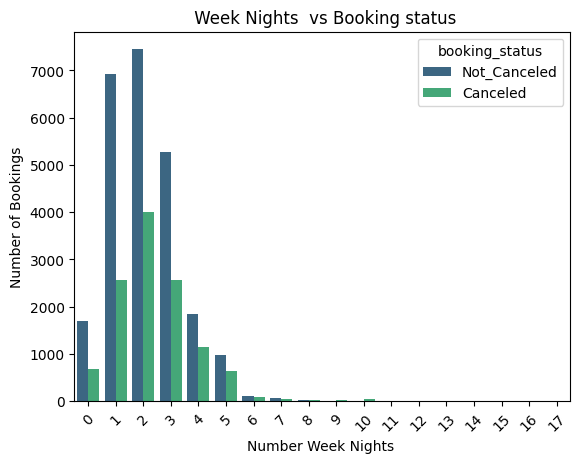

In [ ]:
# week nights v Booking Status
sns.countplot(x='no_of_week_nights',
              hue='booking_status',   # Different colors for each booking status
              data=data,
              palette="viridis")

plt.xticks(rotation=45)
plt.xlabel("Number Week Nights ")
plt.ylabel("Number of Bookings")
plt.title(" Week Nights  vs Booking status")
plt.show()

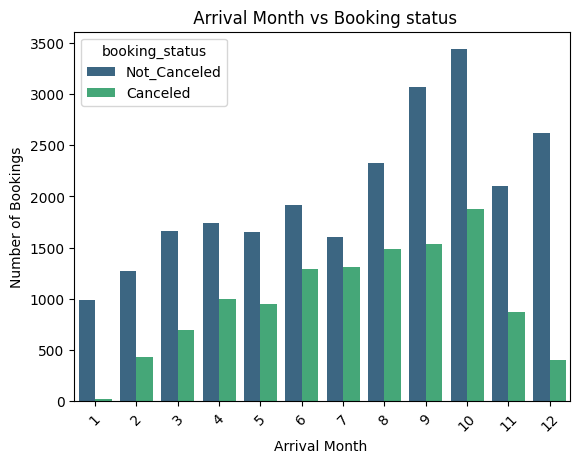

In [ ]:
# Countplot for Arrival Month vs Booking Status
sns.countplot(x='arrival_month',
              hue='booking_status',   # Different colors for each booking status
              data=data,
              palette="viridis")

plt.xticks(rotation=45)
plt.xlabel("Arrival Month ")
plt.ylabel("Number of Bookings")
plt.title(" Arrival Month vs Booking status")
plt.show()

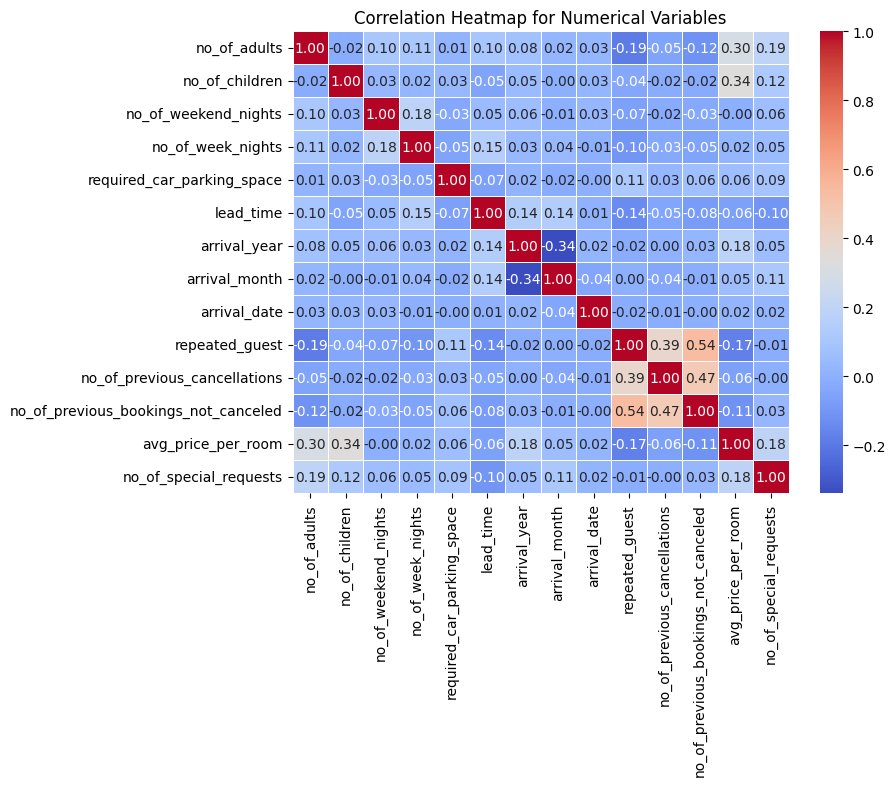

In [ ]:
num_df = data.select_dtypes(include='number')
corr = num_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

# DATA PREPROCESSING

In [ ]:
data.drop(['Booking_ID',],axis=1,inplace=True)

In [ ]:
# Create a dictionary for mapping
status_dict = {'Canceled': 1, 'Not_Canceled': 0}

# Use replace() to apply the mapping to 'booking_status' column
data['booking_status'] = data['booking_status'].replace(status_dict)


In [ ]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

In [ ]:
X = add_constant(X)
X = pd.get_dummies(X, drop_first=True)


In [ ]:
X.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,1.00000,2,0,1,2,0,224,2017,10,2,0,0,0,65.00000,0,False,False,False,False,False,False,False,False,False,False,False,True,False
1,1.00000,2,0,2,3,0,5,2018,11,6,0,0,0,106.68000,1,False,False,True,False,False,False,False,False,False,False,False,False,True
2,1.00000,1,0,2,1,0,1,2018,2,28,0,0,0,60.00000,0,False,False,False,False,False,False,False,False,False,False,False,False,True
3,1.00000,2,0,0,2,0,211,2018,5,20,0,0,0,100.00000,0,False,False,False,False,False,False,False,False,False,False,False,False,True
4,1.00000,2,0,1,1,0,48,2018,4,11,0,0,0,94.50000,0,False,False,True,False,False,False,False,False,False,False,False,False,True


In [ ]:
Y.head()

,booking_status
0,0
1,0
2,1
3,1
4,1


In [ ]:
X=X.astype(float)
Y=Y.astype(float)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
booking_status
0.00000   0.67064
1.00000   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0.00000   0.67638
1.00000   0.32362
Name: proportion, dtype: float64


In [ ]:
import statsmodels.api as sm
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Thu, 01 May 2025   Pseudo R-squ.:                  0.3293
Time:                        14:02:53   Log-Likelihood:                -10793.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.5923    120.817     -7.653      0.000   -1161.390    -687.795
no_of_adults                             0.1135      

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

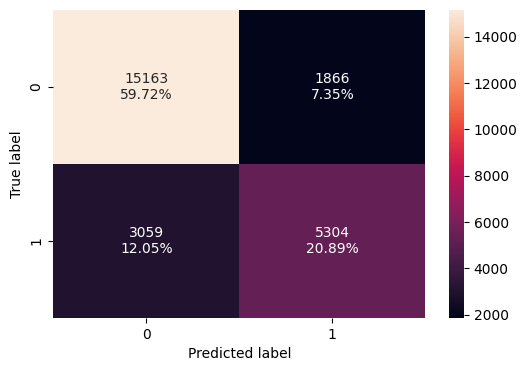

In [ ]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80604,0.63422,0.73975,0.68293


In [ ]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                  39468156.70600
no_of_adults                                  1.34815
no_of_children                                1.97823
no_of_weekend_nights                          1.06948
no_of_week_nights                             1.09567
required_car_parking_space                    1.03993
lead_time                                     1.39491
arrival_year                                  1.43083
arrival_month                                 1.27567
arrival_date                                  1.00674
repeated_guest                                1.78352
no_of_previous_cancellations                  1.39569
no_of_previous_bookings_not_canceled          1.65199
avg_price_per_room                            2.05042
no_of_special_requests                        1.24728
type_of_meal_plan_Meal Plan 2                 1.27185
type_of_meal_plan_Meal Plan 3                 1.02522
type_of_meal_plan_Not Selected                1

In [ ]:
X_train1 = X_train.drop("market_segment_type_Online", axis=1)

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                                  39391371.31459
no_of_adults                                  1.33178
no_of_children                                1.97735
no_of_weekend_nights                          1.06904
no_of_week_nights                             1.09512
required_car_parking_space                    1.03979
lead_time                                     1.39064
arrival_year                                  1.42838
arrival_month                                 1.27463
arrival_date                                  1.00672
repeated_guest                                1.78019
no_of_previous_cancellations                  1.39545
no_of_previous_bookings_not_canceled          1.65175
avg_price_per_room                            2.04959
no_of_special_requests                        1.24242
type_of_meal_plan_Meal Plan 2                 1.27150
type_of_meal_plan_Meal Plan 3                 1.02522
type_of_meal_plan_Not Selected                1

In [ ]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)

print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80577,0.63374,0.73929,0.68246


In [ ]:
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Thu, 01 May 2025   Pseudo R-squ.:                  0.3292
Time:                        14:04:00   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -933.3324    120.655     -7.736      0.000   -1169.813    -696.852
no_of_adults                             0.1060      

In [ ]:
cols = X_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [ ]:
X_train2 = X_train1[selected_features]

In [ ]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)

print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train2, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80541,0.63255,0.73903,0.68166


In [ ]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Thu, 01 May 2025   Pseudo R-squ.:                  0.3283
Time:                        14:04:16   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -917.2860    120.456     -7.615      0.000   -1153.376    -681.196
no_of_adults                       0.1086      0.037      2.914      0.

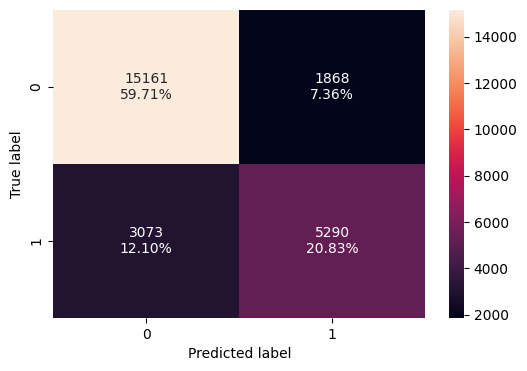

In [ ]:
confusion_matrix_statsmodels(lg2, X_train2, y_train)

In [ ]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg2, X_train2, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80541,0.63255,0.73903,0.68166


In [ ]:
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.11475,1.16436,1.11475,1.04264,0.20305,1.01584,1.57324,0.95853,0.06480,1.25716,1.01935,0.22994,1.17992,1.33089,0.70046,0.75383,0.47940,0.38099,0.23903,0.45258,0.16750
Change_odd%,-100.00000,11.47536,16.43601,11.47526,4.26363,-79.69523,1.58352,57.32351,-4.14725,-93.52026,25.71567,1.93479,-77.00595,17.99156,33.08924,-29.95389,-24.61701,-52.05967,-61.90093,-76.09669,-54.74162,-83.24963


In [ ]:
X_test1 = X_test[list(X_train2.columns)]

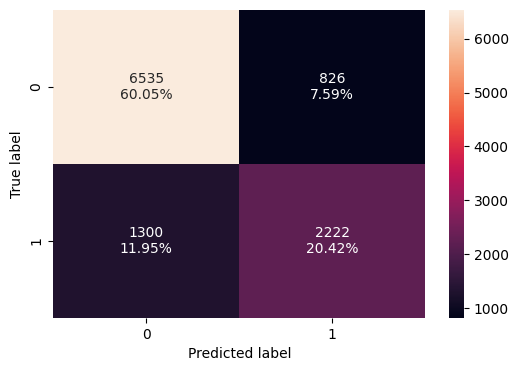

In [ ]:
confusion_matrix_statsmodels(lg2, X_test1, y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg2, X_test1, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641


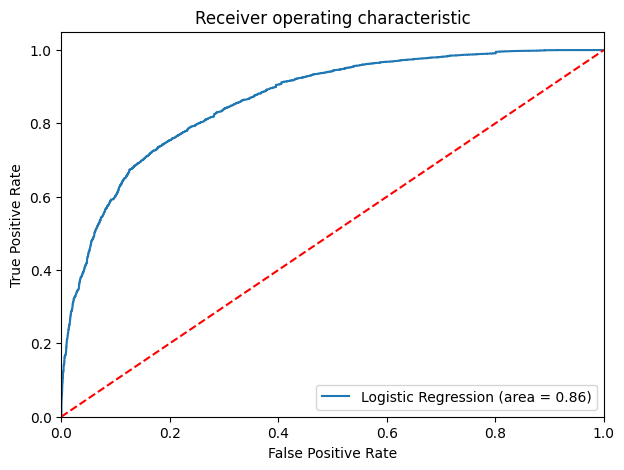

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3710466623488775


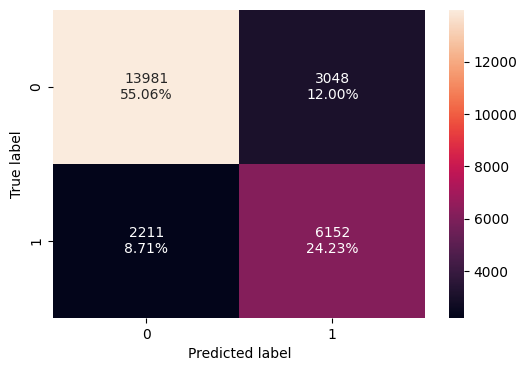

In [ ]:
confusion_matrix_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [ ]:
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79289,0.73562,0.66870,0.70056


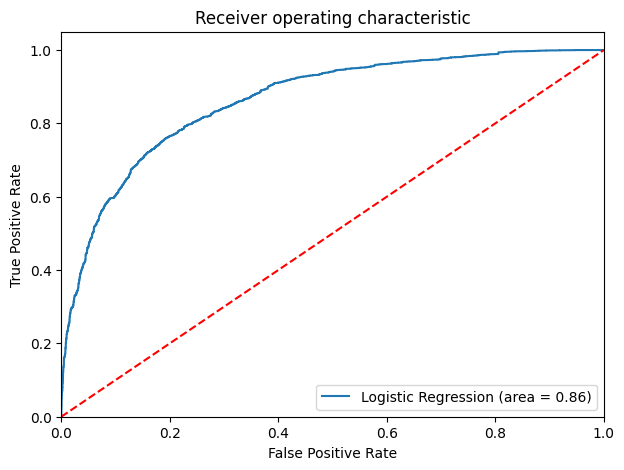

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, lg2.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

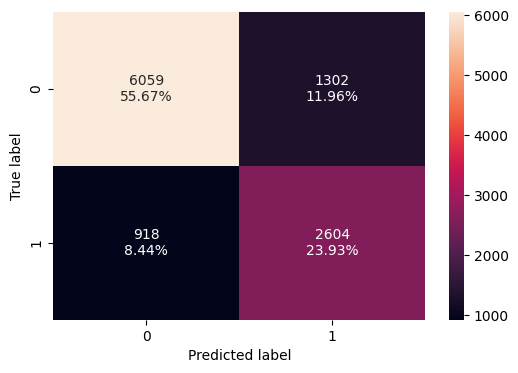

In [ ]:
confusion_matrix_statsmodels(lg2, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [ ]:
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79601,0.73935,0.66667,0.70113


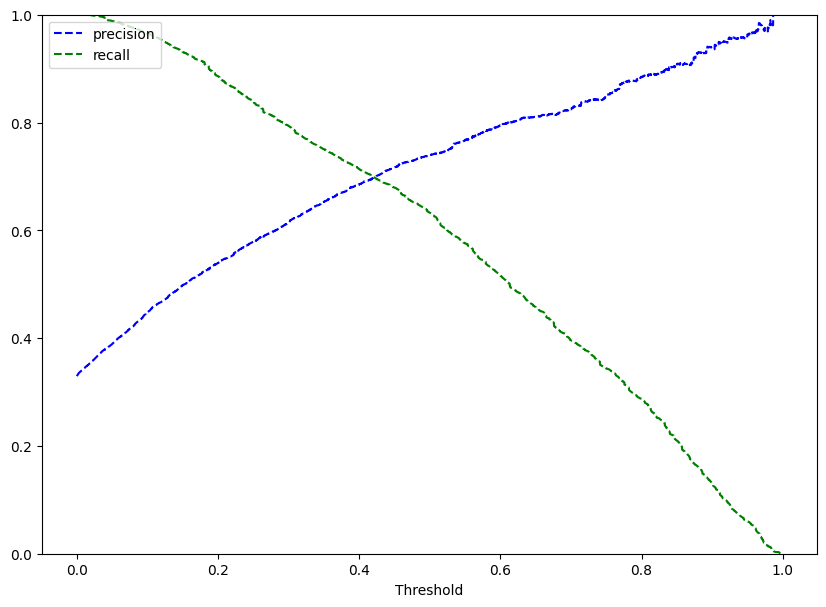

In [ ]:
y_scores = lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [ ]:
optimal_threshold_curve = 0.4

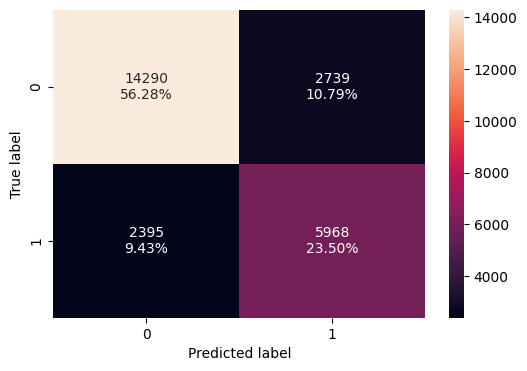

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79781,0.71362,0.68543,0.69924


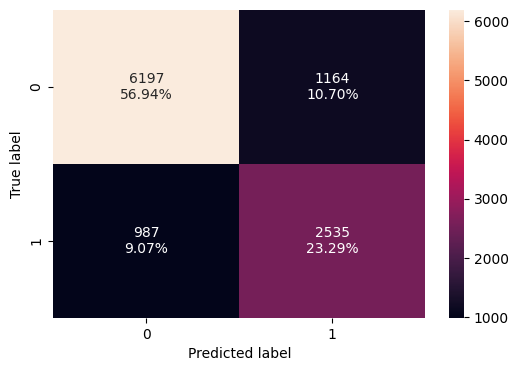

In [ ]:
confusion_matrix_statsmodels(lg2, X_test1, y_test, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80235,0.71976,0.68532,0.70212


In [ ]:

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.371 Threshold",
    "Logistic Regression-0.4 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.371 Threshold,Logistic Regression-0.4 Threshold
Accuracy,0.80541,0.79289,0.79781
Recall,0.63255,0.73562,0.71362
Precision,0.73903,0.66870,0.68543
F1,0.68166,0.70056,0.69924


In [ ]:
models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.371 Threshold",
    "Logistic Regression-0.4 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.371 Threshold,Logistic Regression-0.4 Threshold
Accuracy,0.80465,0.79601,0.80235
Recall,0.63089,0.73935,0.71976
Precision,0.72900,0.66667,0.68532
F1,0.67641,0.70113,0.70212


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=0
)

y_train.reset_index(inplace = True, drop = True)

In [ ]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

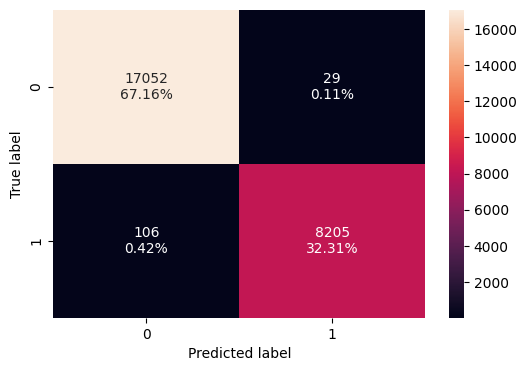

In [ ]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [ ]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,0.994683,0.987246,0.996478,0.99184


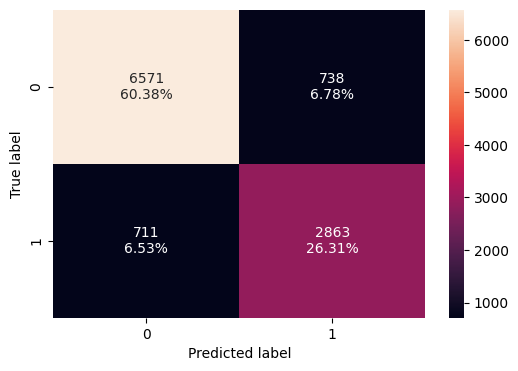

In [ ]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [ ]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.866857,0.801063,0.795057,0.798049


In [ ]:
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

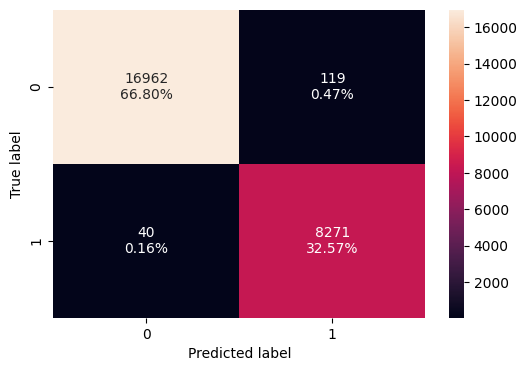

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.993738,0.995187,0.985816,0.99048


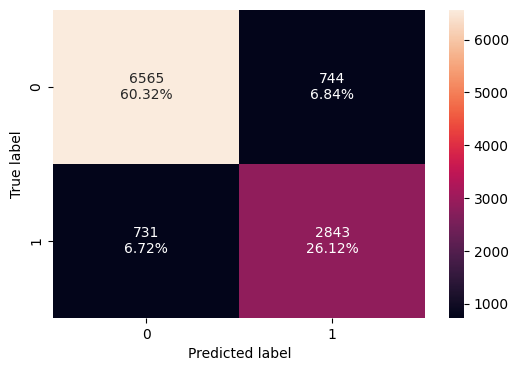

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.864468,0.795467,0.792584,0.794023


In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": [2, 3, 5, 7, 10, 15],
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],

}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

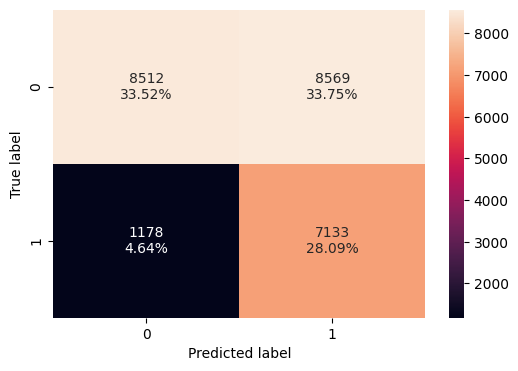

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.616139,0.85826,0.454273,0.594095


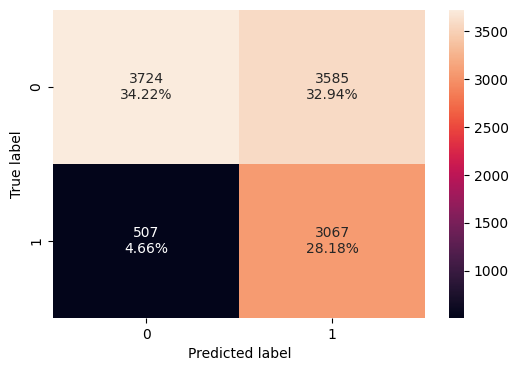

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.624001,0.858142,0.461064,0.599844


In [ ]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

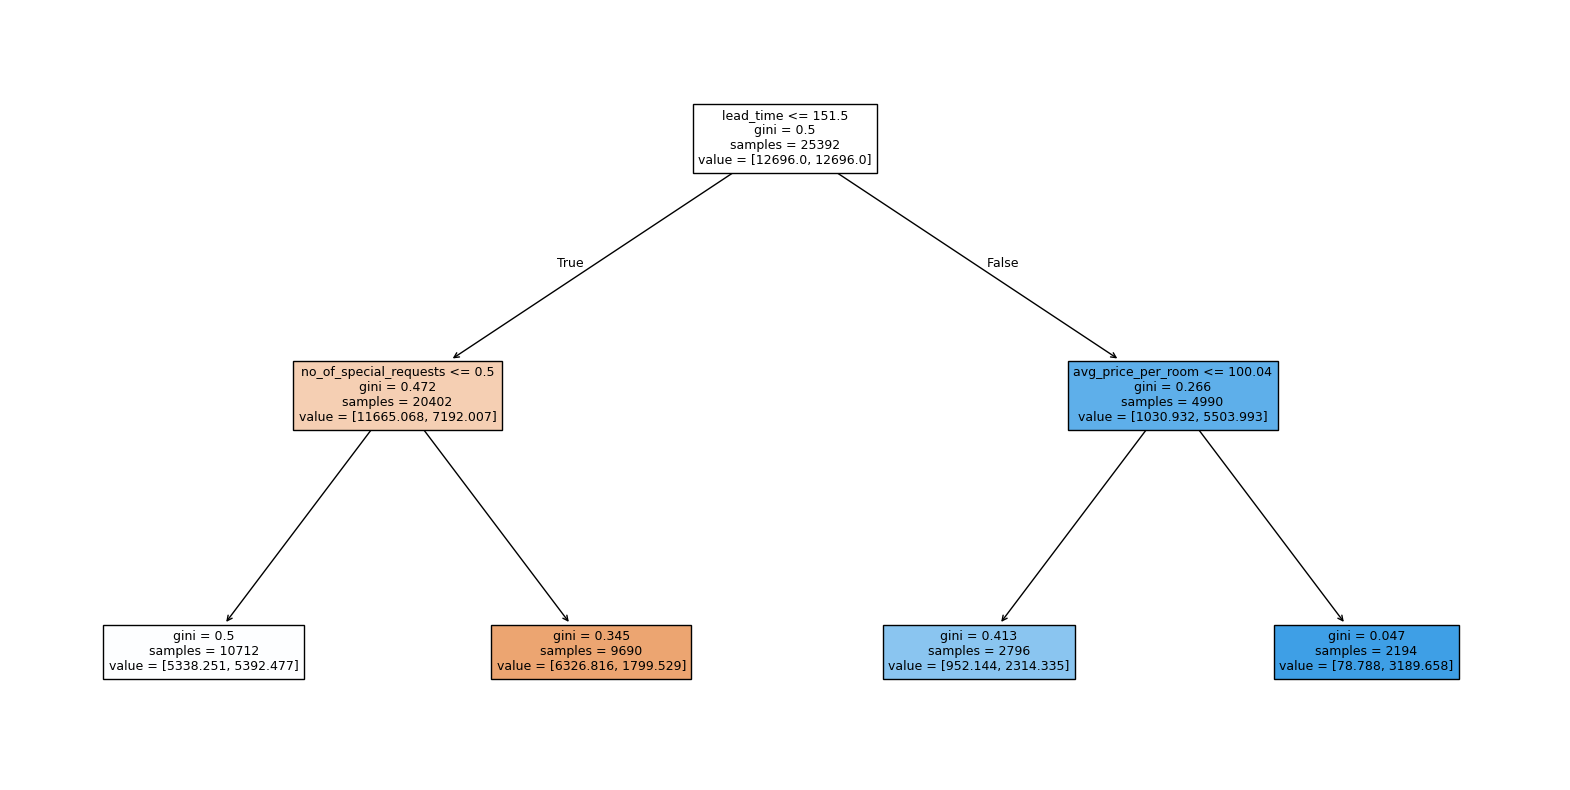

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- weights: [5338.25, 5392.48] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [6326.82, 1799.53] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- weights: [952.14, 2314.34] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- weights: [78.79, 3189.66] class: 1



In [ ]:
importances = estimator.feature_importances_
importances

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.68129192, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.07720625, 0.24150182, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

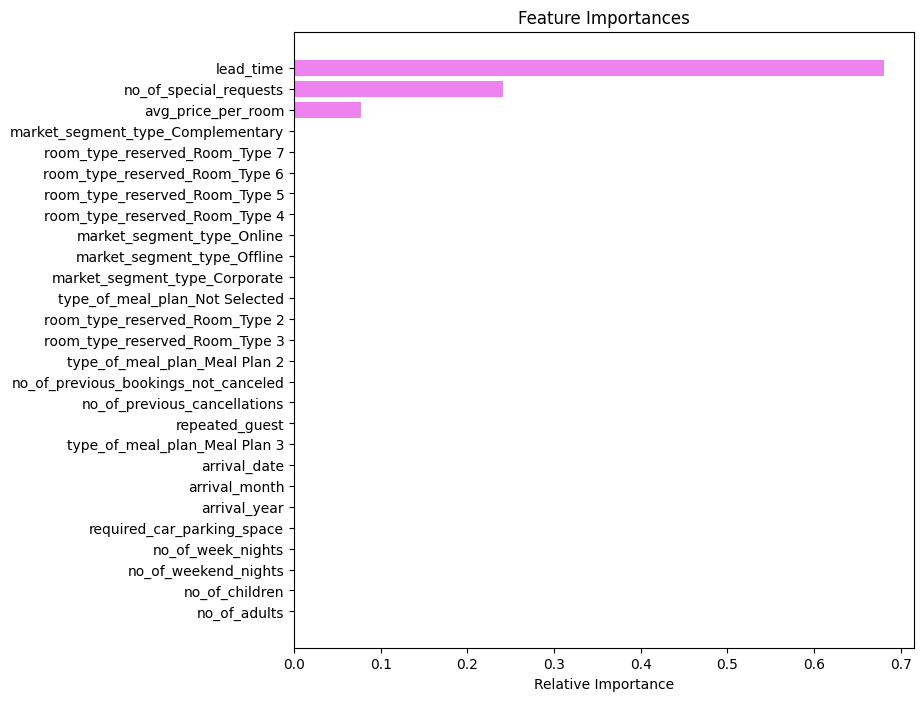

In [ ]:

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.007867
1,2.599902e-20,0.007867
2,2.599902e-20,0.007867
3,2.599902e-20,0.007867
4,2.599902e-20,0.007867
...,...,...
1745,9.199918e-03,0.329110
1746,9.956616e-03,0.339066
1747,1.250338e-02,0.351570
1748,3.362369e-02,0.418817


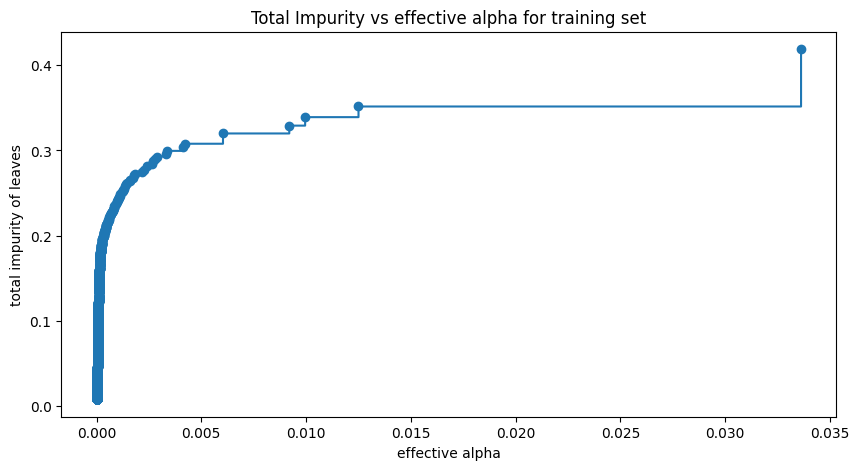

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08118292867779064


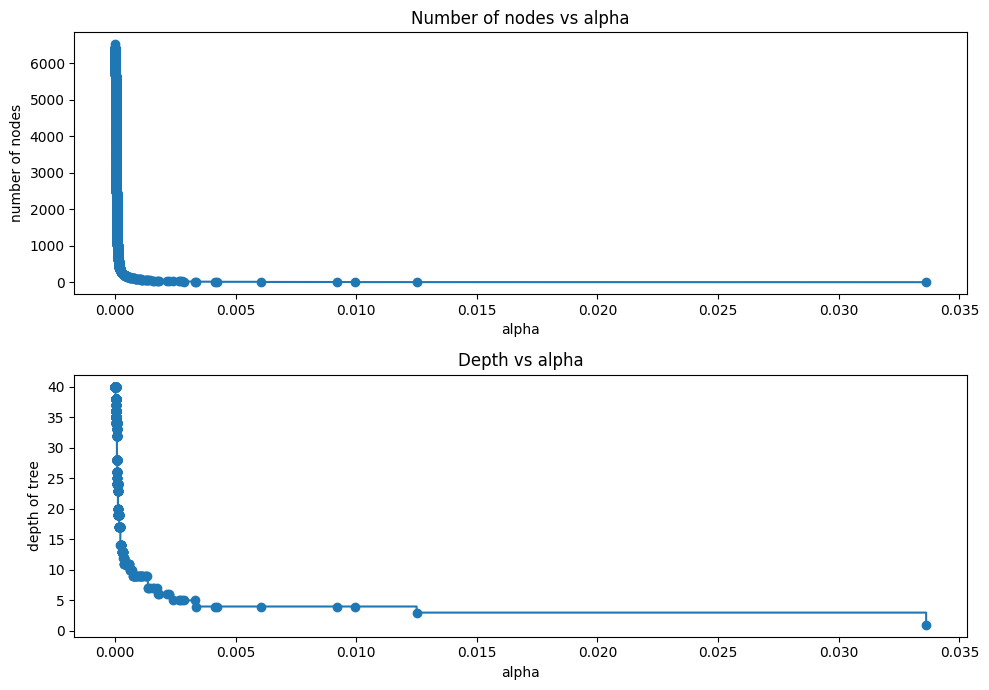

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

In [ ]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.00010321157953361172),
                       class_weight='balanced', random_state=1)


In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.906309,0.928528,0.812145,0.866446


In [ ]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.864743,0.862339,0.75874,0.807229


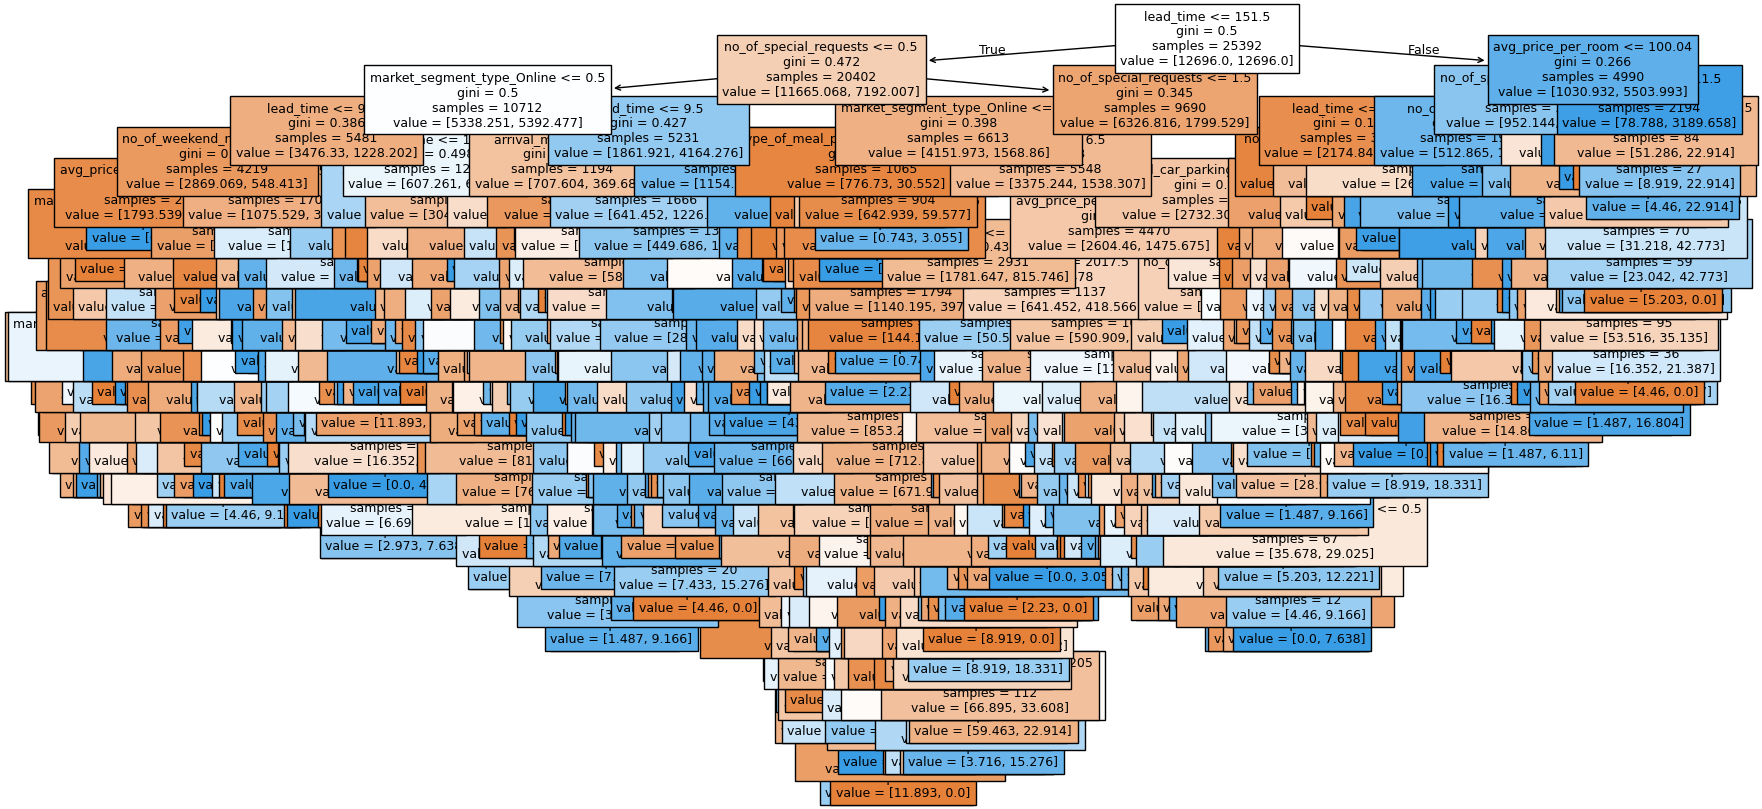

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 92.00
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [172.44, 13.75] class: 0
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  16.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  92.00
|   |   |   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

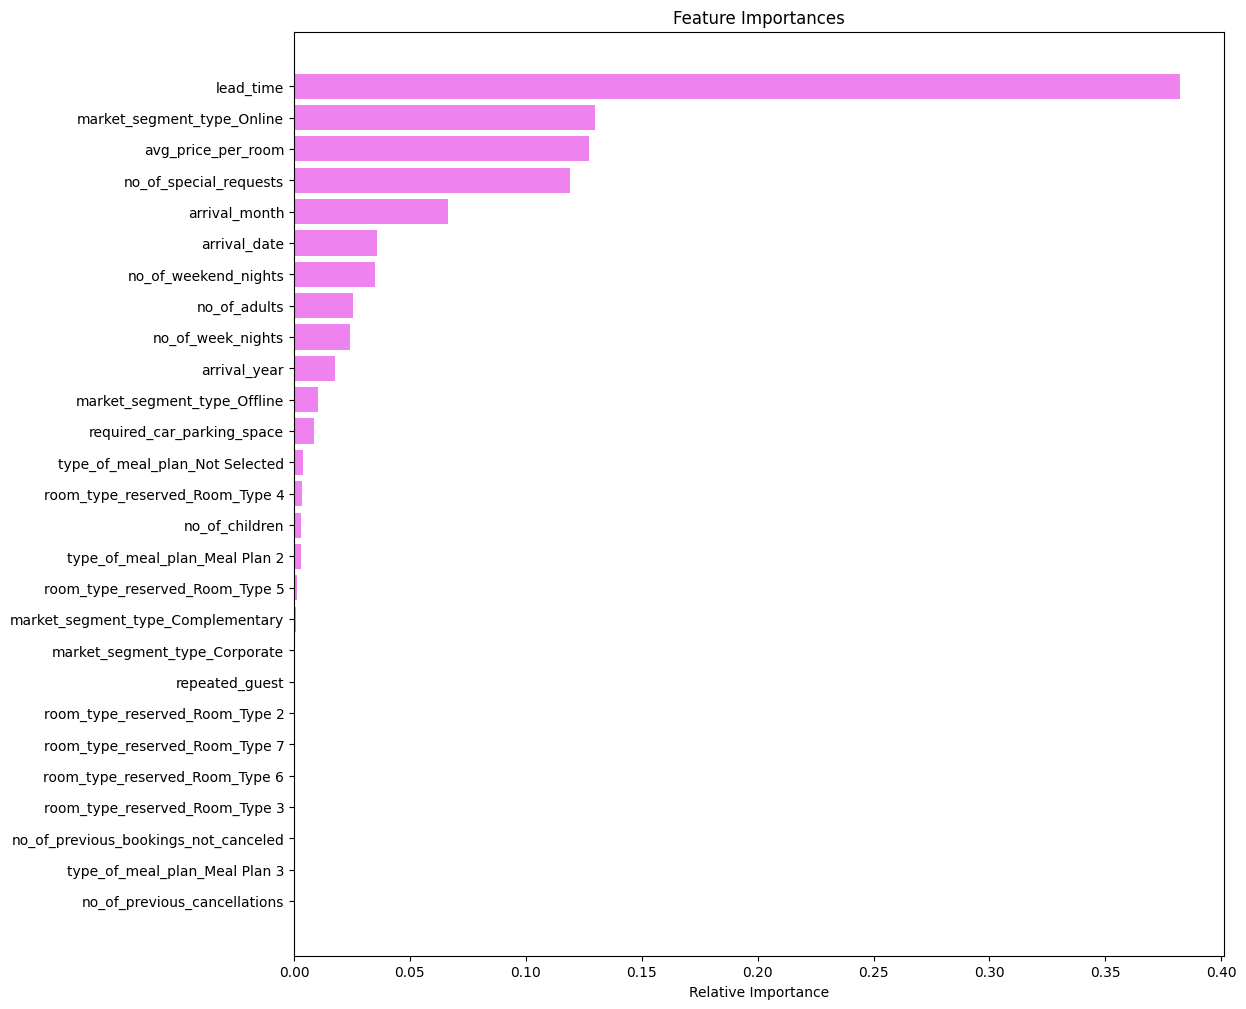

In [ ]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.994683,0.993738,0.616139,0.906309
Recall,0.987246,0.995187,0.858260,0.928528
Precision,0.996478,0.985816,0.454273,0.812145
F1,0.991840,0.990480,0.594095,0.866446


In [ ]:
import numpy as np
import pandas as pd

# Flatten each model's results
basic_tree_scores = np.squeeze(decision_tree_perf_test_without)
weighted_tree_scores = np.squeeze(decision_tree_perf_test)
pre_pruned_scores = np.squeeze(decision_tree_tune_perf_test)
post_pruned_scores = np.squeeze(decision_tree_post_test)

# Collect all into a list
summary_data = [
    basic_tree_scores,
    weighted_tree_scores,
    pre_pruned_scores,
    post_pruned_scores
]

# Now create the DataFrame
summary_df = pd.DataFrame(
    summary_data,
    index=["Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",],
    columns=['Accuracy', 'Precision', 'Recall', 'F1']
)
summary_df

,Accuracy,Precision,Recall,F1
Decision Tree without class_weight,0.866857,0.795057,0.801063,0.798049
Decision Tree with class_weight,0.864468,0.792584,0.795467,0.794023
Decision Tree (Pre-Pruning),0.624001,0.461064,0.858142,0.599844
Decision Tree (Post-Pruning),0.864743,0.758740,0.862339,0.807229
